In [1]:
import keras

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

In [3]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "C:/Users/yang/Desktop/dogs-vs-cats/small/"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i+=1
        if i * batch_size>=sample_count:
            break
    return features, labels

In [5]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.


NameError: name 'conv_base' is not defined

In [6]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [7]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc']) 

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))
              


Epoch 1/30
100/100 [==============================] - 1s 10ms/step - loss: 0.5871 - acc: 0.6730 - val_loss: 0.4445 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 1s 10ms/step - loss: 0.4336 - acc: 0.7995 - val_loss: 0.3635 - val_acc: 0.8630
Epoch 3/30
100/100 [==============================] - 1s 9ms/step - loss: 0.3694 - acc: 0.8380 - val_loss: 0.3285 - val_acc: 0.8730
Epoch 4/30
100/100 [==============================] - 1s 9ms/step - loss: 0.3230 - acc: 0.8605 - val_loss: 0.3050 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2949 - acc: 0.8770 - val_loss: 0.2968 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2774 - acc: 0.8850 - val_loss: 0.2803 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2548 - acc: 0.8960 - val_loss: 0.2739 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 1s 9ms/step - loss: 

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']  # 训练资料的正确性
val_acc = history.history['val_acc']  # val 测试资料的正确性
loss = history.history['loss']  # 训练资料的损失值
val_loss = history.history['val_loss']  # val 测试资料的损失值

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

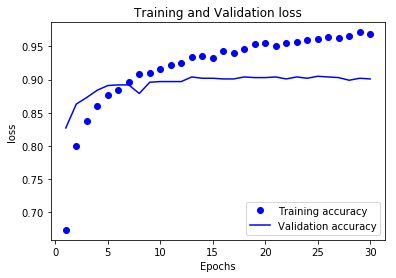

In [9]:
plt.clf()

plt.plot(epochs,acc , 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
len(model.trainable_weights)  # 估计模型参数层数

30

In [13]:
conv_base.trainable = False

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
               rescale=1./255,
               rotation_range=40,
               width_shift_range=0.2,
               height_shift_range=0.2,
               shear_range=0.2,
               horizontal_flip=0.2,
               fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150,150),
            batch_size=20,
            class_mode='binary')

validation_genetator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150,150),
            batch_size = 20,
            class_mode = 'binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30,
                              validation_data=validation_genetator,
                              validation_steps=50,
                              )

NameError: name 'train_dir' is not defined

In [ ]:
model.save("cats_and_dogs_small_3.h5")

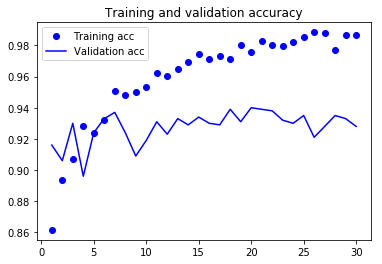

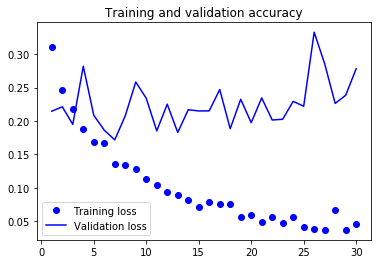

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()


In [25]:
conv_base.trainable=True


set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False
        
test_datagen = ImageDataGenerator(rescale=1./255)
        
validation_genetator = test_datagen.flow_from_directory(
            test_dir,
            target_size=(150,150),
            batch_size = 20,
            class_mode = 'binary')
        
model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-5),
                      metrics=['acc'])


history=model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_genetator,
      validation_steps=50)

Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 51s 511ms/step - loss: 0.0235 - acc: 0.9930 - val_loss: 0.3552 - val_acc: 0.9340
Epoch 2/100
100/100 [==============================] - 51s 511ms/step - loss: 0.0244 - acc: 0.9910 - val_loss: 0.2930 - val_acc: 0.9400
Epoch 3/100
100/100 [==============================] - 51s 511ms/step - loss: 0.0278 - acc: 0.9905 - val_loss: 0.2828 - val_acc: 0.9320
Epoch 4/100
100/100 [==============================] - 51s 512ms/step - loss: 0.0133 - acc: 0.9950 - val_loss: 0.3092 - val_acc: 0.9390
Epoch 5/100
100/100 [==============================] - 51s 513ms/step - loss: 0.0213 - acc: 0.9935 - val_loss: 0.3262 - val_acc: 0.9460
Epoch 6/100
100/100 [==============================] - 51s 512ms/step - loss: 0.0174 - acc: 0.9935 - val_loss: 0.3273 - val_acc: 0.9340
Epoch 7/100
100/100 [==============================] - 51s 512ms/step - loss: 0.0160 - acc: 0.9940 - val_loss: 0.4154 - val_acc: 0.9340
Epoch 

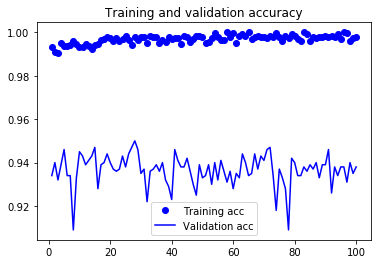

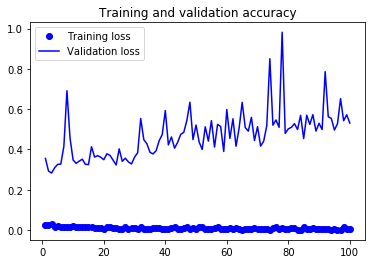

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()